# Install necessary libraries

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

# Import dependancies

In [122]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import seaborn as sns
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import confusion_matrix

# Data preprocessing

In [3]:
data_dir = 'C:/Users/IKG/FYP/Elder_identification/data'

In [4]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [5]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

In [111]:
data = tf.keras.preprocessing.image_dataset_from_directory('C:/Users/IKG/FYP/Elder_identification/data')

Found 204 files belonging to 2 classes.


In [112]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

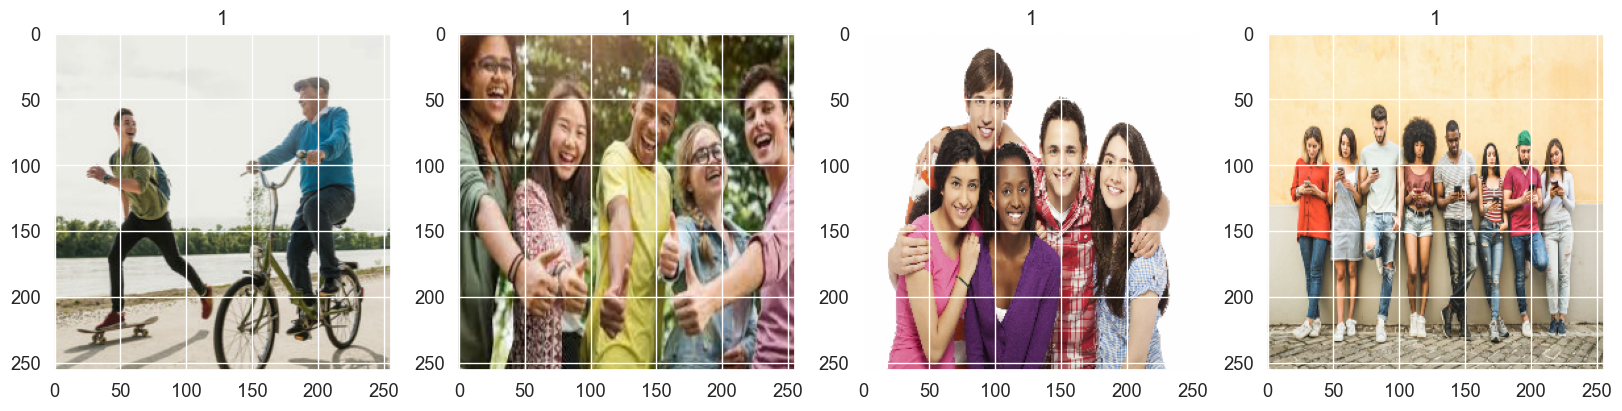

In [113]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [9]:
data = data.map(lambda x,y: (x/255, y))

In [10]:
data.as_numpy_iterator().next()

(array([[[[0.06862745, 0.07254902, 0.04117647],
          [0.07450981, 0.07843138, 0.04705882],
          [0.07320006, 0.07712163, 0.04574908],
          ...,
          [0.98039216, 0.99019605, 0.99607843],
          [0.9862745 , 0.9882353 , 0.99607843],
          [0.9882353 , 0.9882353 , 0.99607843]],
 
         [[0.06862745, 0.07254902, 0.04117647],
          [0.07843138, 0.08235294, 0.05098039],
          [0.07647825, 0.08039982, 0.04902727],
          ...,
          [0.9784237 , 0.9911803 , 0.99607843],
          [0.9843137 , 0.9882353 , 0.99607843],
          [0.98725104, 0.9882353 , 0.99607843]],
 
         [[0.07254902, 0.07647059, 0.04509804],
          [0.07876455, 0.08268612, 0.05131357],
          [0.07972579, 0.08364736, 0.05227482],
          ...,
          [0.9764706 , 0.99215686, 0.99607843],
          [0.98039216, 0.99019605, 0.99607843],
          [0.9843137 , 0.9882353 , 0.99607843]],
 
         ...,
 
         [[0.0254902 , 0.05294118, 0.08039216],
          [0.02515

In [125]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [132]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [133]:
test_size

1

# Build CNN model

In [134]:
model = Sequential()

In [135]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [136]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [137]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 60, 16)        4624      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 14400)            

# Train model and validation

In [138]:
logdir='C:/Users/IKG/FYP/Elder_identification/logs'

In [139]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [140]:
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/30
4/4 [==============================] - 11s 2s/step - loss: 417.9819 - accuracy: 0.5391 - val_loss: 22.1668 - val_accuracy: 0.5781
Epoch 2/30
4/4 [==============================] - 9s 2s/step - loss: 17.6664 - accuracy: 0.4844 - val_loss: 2.6733 - val_accuracy: 0.4688
Epoch 3/30
4/4 [==============================] - 9s 2s/step - loss: 5.7905 - accuracy: 0.4766 - val_loss: 3.4023 - val_accuracy: 0.5156
Epoch 4/30
4/4 [==============================] - 9s 2s/step - loss: 3.1722 - accuracy: 0.5156 - val_loss: 1.1172 - val_accuracy: 0.7031
Epoch 5/30
4/4 [==============================] - 9s 2s/step - loss: 1.2061 - accuracy: 0.5859 - val_loss: 0.6836 - val_accuracy: 0.6719
Epoch 6/30
4/4 [==============================] - 9s 2s/step - loss: 1.1473 - accuracy: 0.6094 - val_loss: 0.9757 - val_accuracy: 0.5469
Epoch 7/30
4/4 [==============================] - 9s 2s/step - loss: 0.6927 - accuracy: 0.6719 - val_loss: 0.6147 - val_accuracy: 0.7031
Epoch 8/30
4/4 [====================

# Model result visualization

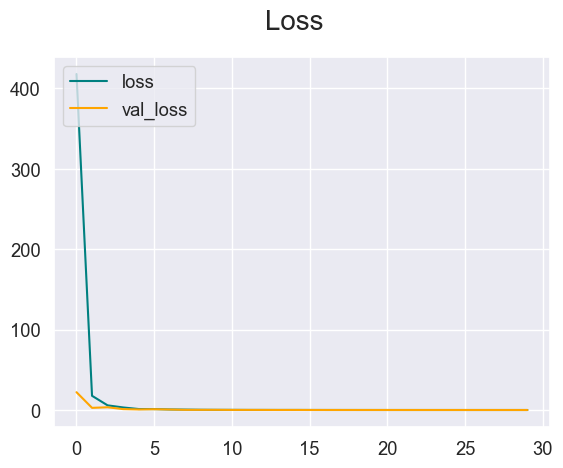

In [141]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

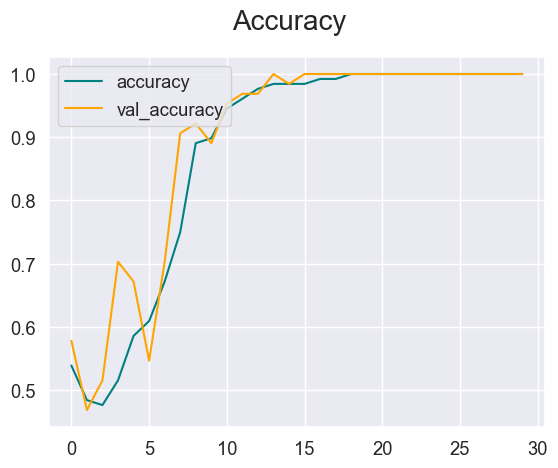

In [142]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

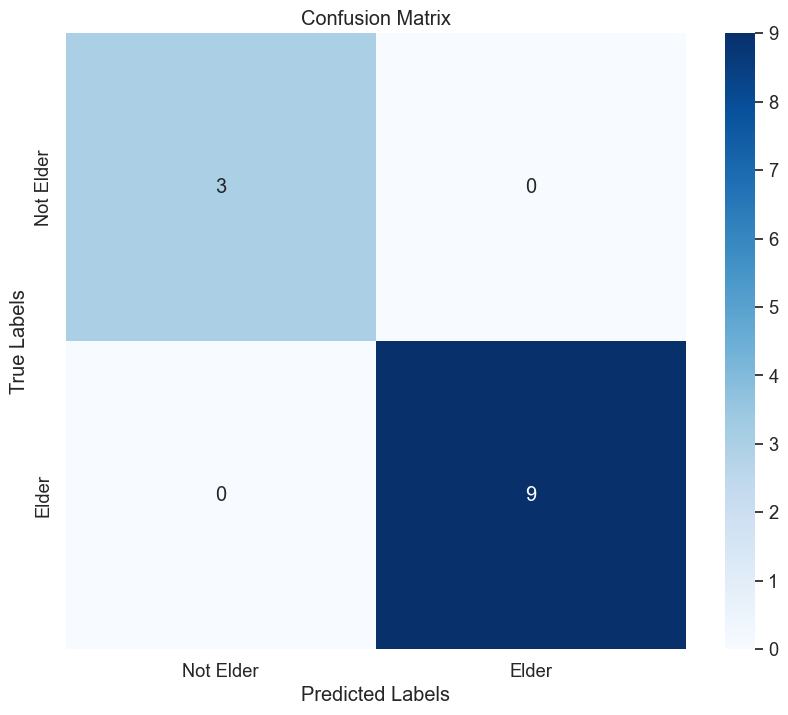

Precision: 1.0
Recall: 1.0
Accuracy: 1.0


In [179]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

conf_matrix = np.zeros((2, 2))  # Initialize the overall confusion matrix

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
    predicted_labels = (yhat > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)
    true_labels = y  # Use true labels directly if they are not one-hot encoded
    batch_conf_matrix = confusion_matrix(true_labels, predicted_labels)
    conf_matrix += batch_conf_matrix  # Accumulate batch confusion matrices

# Calculate metrics
precision_value = pre.result().numpy()
recall_value = re.result().numpy()
accuracy_value = acc.result().numpy()

# Create heatmap
class_names = ['Not Elder', 'Elder']
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt=".0f", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Print metrics
print("Precision:", precision_value)
print("Recall:", recall_value)
print("Accuracy:", accuracy_value)

# Test new image

In [180]:
def predictAdult(imgUrl):
    img = cv2.imread(imgUrl)
    resize = tf.image.resize(img, (256,256))
    plt.imshow(resize.numpy().astype(int))
    plt.show()
    yhat = model.predict(np.expand_dims(resize/255, 0))
    if yhat > 0.5: 
        print(f'Predicted class is not elder')
        return False
    else:
        print(f'Predicted class is elder')
        return True

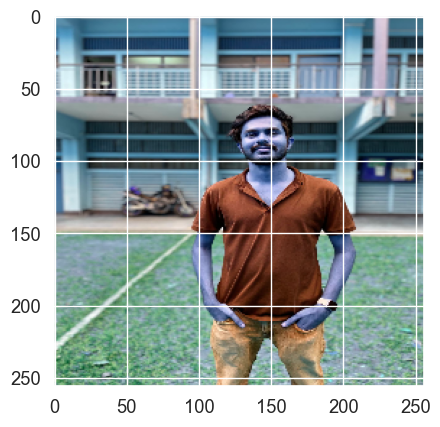

Predicted class is not elder
is adult:  False


In [181]:
imgUrl = 'C:/Users/IKG/FYP/Elder_identification/test1.jpeg'
isAdult=predictAdult(imgUrl)
print('is adult: ',isAdult)

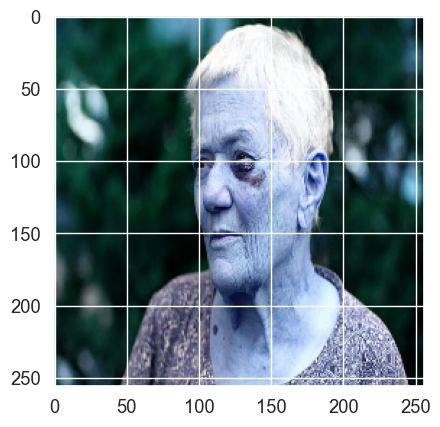

Predicted class is elder
is adult:  True


In [182]:
imgUrl = 'C:/Users/IKG/FYP/Elder_identification/elder.jpg'
isAdult=predictAdult(imgUrl)
print('is adult: ',isAdult)

# Save the model

In [183]:
model.save(os.path.join('C:/Users/IKG/FYP/Elder_identification/models','imageclassifier.h5'))